Thêm thư viện

In [1]:
import csv
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    confusion_matrix,
    f1_score,
    accuracy_score,
    precision_score,
    recall_score,
)
import joblib
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []

Xử lý dữ liệu

In [2]:
# Load dữ liệu
data=pd.read_csv("bank-full.csv",delimiter=';')

print("Số thuộc tính: ",len(data.columns))
n=len(data.columns)
print(data)

# Lấy danh sách các cột categorical
categorical_cols = data.select_dtypes(include=['object']).columns

# Lặp qua các cột categorical và in số lượng giá trị khác nhau
for col in categorical_cols:
    print(f"Thuộc tính '{col}':")
    value_counts = data[col].value_counts()
    for value, count in value_counts.items():
        print(f"  {value}: {count}")
    print()


# In tên thuộc tính
ds_thuoctinh = list(data.iloc[:,0:n-1].columns)
print("Các thuộc tính của tập dữ liệu: ",ds_thuoctinh)

cac_nhan=list(np.unique(data.iloc[:,-1:]))
print("Cột nhãn: ",list(data.iloc[:,-1:].columns))
print("Các nhãn: ",cac_nhan)

# Điếm giá trị của cột nhãn
print(data.iloc[:,-1:].value_counts())

# Giá trị thiếu
print("Missing value:")
print((data[ds_thuoctinh]=='').sum())

#Tiền xử lý dữ liệu
list_dt = []
le = preprocessing.LabelEncoder()


for (columnName, columnData) in data.iloc[:,0:n-1].items():
    # Kiểm tra nếu dữ liệu không phải là số
    if not pd.to_numeric(columnData, errors='coerce').notnull().all():
        le.fit(list(data[columnName]))
        nhan_cot = set(list(data[columnName]))
        data[columnName] = le.transform(list(data[columnName]))
        dic_dt = {}
        for i in nhan_cot:
            dic_dt[i] = int(le.transform([i])[0])
        list_dt.append(dic_dt)
    else:
        list_dt.append({})  # Thêm một từ điển trống nếu dữ liệu là số

X_data = data.iloc[:,0:n-1]
y_target = data.iloc[:,-1:]

for i in range(len(list_dt)):
    print(ds_thuoctinh[i])
    print(list_dt[i])

print(data)

# save the results to a new file
data.to_csv('bank_numbered.csv', index=False)


# Chuẩn hóa ALL
# Chọn cột kiểu số để chuẩn hóa
numeric_cols = data.select_dtypes(include=['int']).columns

# Danh sách các cột số cần chuẩn hóa
print(numeric_cols)
# # Hiển thị thống kê mô tả các thuộc tính số
# print(car_ev.describe())

scaler = MinMaxScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


# save the results to a new file
data.to_csv('bank_standardized.csv', index=False)

print(data)

Số thuộc tính:  17
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  dur

Load dữ liệu tập đã được xử lý

In [3]:
# Load the dataset
def loadData(path):
  f=open(path, "r")
  data = csv.reader(f)
  data = np.array(list(data))
  data = np.delete(data,0,0)
  np.random.shuffle(data)
  f.close()
  return data

dulieuLoad = loadData("bank_standardized.csv")

dulieu_X_temp = dulieuLoad[:, :-1]  # Lấy tất cả các cột ngoại trừ cột cuối cùng
dulieu_X = dulieu_X_temp.astype(np.float64)

dulieu_Y = dulieuLoad[:, -1]   # Lấy cột cuối cùng làm dữ liệu nhãn

print('dulieu_X',dulieu_X)
print('dulieu_Y',dulieu_Y)
print(dulieuLoad)

dulieu_X [[0.11688312 0.36363636 1.         ... 0.43348624 0.01090909 0.66666667]
 [0.05194805 0.72727273 1.         ... 0.40481651 0.00363636 0.33333333]
 [0.36363636 0.09090909 0.5        ... 0.         0.         1.        ]
 ...
 [0.28571429 0.09090909 0.5        ... 0.         0.         1.        ]
 [0.46753247 0.36363636 0.         ... 0.         0.         1.        ]
 [0.12987013 0.09090909 0.5        ... 0.38990826 0.00363636 0.33333333]]
dulieu_Y ['no' 'no' 'no' ... 'no' 'yes' 'no']
[['0.11688311688311687' '0.36363636363636365' '1.0' ...
  '0.01090909090909091' '0.6666666666666666' 'no']
 ['0.051948051948051965' '0.7272727272727273' '1.0' ...
  '0.0036363636363636364' '0.3333333333333333' 'no']
 ['0.3636363636363637' '0.09090909090909091' '0.5' ... '0.0' '1.0' 'no']
 ...
 ['0.28571428571428575' '0.09090909090909091' '0.5' ... '0.0' '1.0' 'no']
 ['0.4675324675324675' '0.36363636363636365' '0.0' ... '0.0' '1.0' 'yes']
 ['0.12987012987012986' '0.09090909090909091' '0.5' ...
  '

Huấn luyện Gauss 10 lần

Acc=74.55419876009769, Prec=76.69818332606972, Recall=74.55419876009769, F1=74.03651552327467
Độ chính xác trên tập huấn luyện: 74.00533451922543
Độ chính xác trên tập kiểm tra: 74.03651552327467


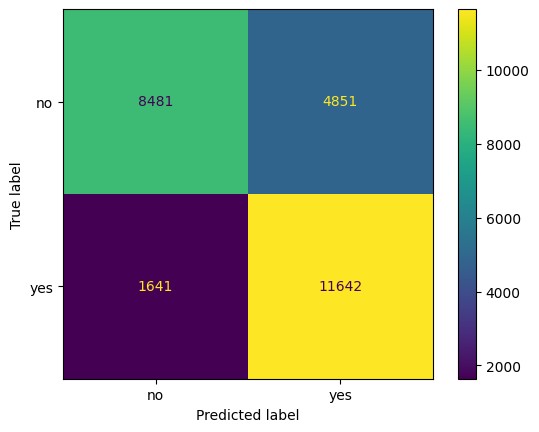

In [4]:
import random
import statistics

# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()


temp=[]
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

best_f1 = 0 
best_model = None
best_conf_matrix = None

for each in range(1,11):

  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape

  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm, y_sm, test_size=1/3, random_state=each)

  model = GaussianNB()
  model.fit(X_Train, Y_Train)

  Y_Pred_train = model.predict(X_Train)
  Y_Pred = model.predict(X_Test)

  Ketqua_accuracy = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_precision = precision_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_recall = recall_score(Y_Test, Y_Pred, average='weighted')*100

  Ketqua_f1 = f1_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  
  avg_acc.append(Ketqua_accuracy)
  avg_prec.append(Ketqua_precision)
  avg_rec.append(Ketqua_recall)
  avg_f1.append(Ketqua_f1)
  avg_f1_train.append(Ketqua_f1_train)

  if Ketqua_f1 > best_f1:
    best_f1 = Ketqua_f1
    best_model = model
    best_conf_matrix = confusion_matrix(Y_Test, Y_Pred)


acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
recall = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

# # Lưu mô hình tốt nhất xuống tệp 
# if best_model is not None:
#     joblib.dump(best_model, 'model_bayes.pkl')
#     print("Model saved as 'model_bayes.pkl'.")
# else:
#     print("No best model found.")

print("Acc={}, Prec={}, Recall={}, F1={}".format(acc, prec, recall, f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

# Hiển thị confusion matrix của mô hình tốt nhất
if best_conf_matrix is not None:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=cac_nhan)
    disp.plot()
else:
    print("No best confusion matrix found.")

Huấn luyện Decision Tree 10 lần

Acc=89.02573736614691, Prec=89.03386181784377, Recall=89.02573736614691, F1=89.02505658760764
Độ chính xác trên tập huấn luyện: 90.84762080372535
Độ chính xác trên tập kiểm tra: 89.02505658760764


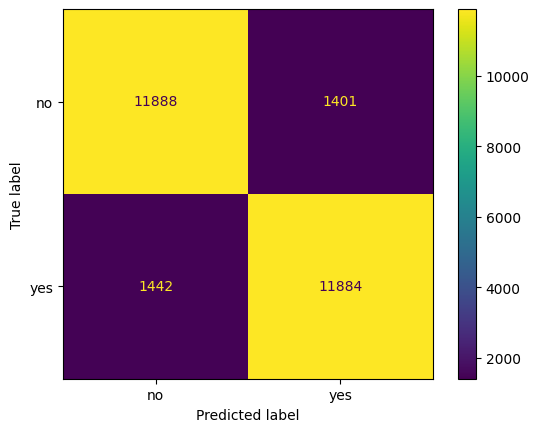

In [5]:
import random
import statistics
# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()

temp=[]
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

best_f1 = 0 
best_model = None
best_conf_matrix = None


for each in range(1,11):

  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape

  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm, y_sm, test_size=1/3, random_state=100)

  model = DecisionTreeClassifier(criterion="gini", 
                                 random_state=100, 
                                 max_depth=16, 
                                 min_samples_split=100, 
                                 min_samples_leaf=10, 
                                 max_features=16)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)

  Ketqua_accuracy = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_precision = precision_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_recall = recall_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1 = f1_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  avg_acc.append(Ketqua_accuracy)
  avg_prec.append(Ketqua_precision)
  avg_rec.append(Ketqua_recall)
  avg_f1.append(Ketqua_f1)
  avg_f1_train.append(Ketqua_f1_train)

  if Ketqua_f1 > best_f1:
    best_f1 = Ketqua_f1
    best_model = model
    best_conf_matrix = confusion_matrix(Y_Test, Y_Pred)


acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
recall = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

# # Lưu mô hình tốt nhất xuống tệp 
# if best_model is not None:
#     joblib.dump(best_model, 'model_dt.pkl')
#     print("Model saved as 'model_dt.pkl'.")
# else:
#     print("No best model found.")

print("Acc={}, Prec={}, Recall={}, F1={}".format(acc, prec, recall, f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

# Hiển thị confusion matrix của mô hình tốt nhất
if best_conf_matrix is not None:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=cac_nhan)
    disp.plot()
else:
    print("No best confusion matrix found.")

Huấn luyện Random Forest 10 lần

Acc=87.86473792973887, Prec=88.0314595550807, Recall=87.86473792973887, F1=87.84971910568945
Độ chính xác trên tập huấn luyện: 88.40890495200563
Độ chính xác trên tập kiểm tra: 87.84971910568945


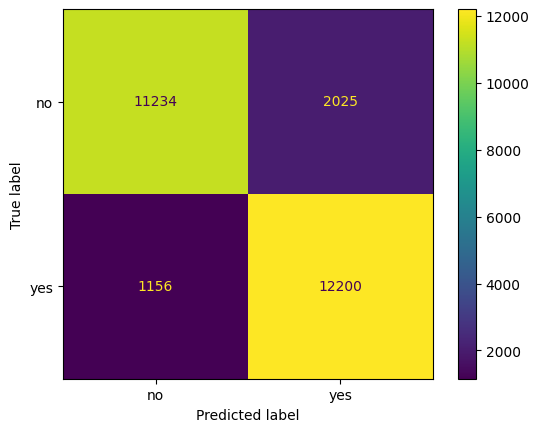

In [6]:
import random
import statistics

# SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE()


temp=[]
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

best_f1 = 0 
best_model = None
best_conf_matrix = None

for each in range(1,11):
  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape

  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm, y_sm, test_size=1/3, random_state=125 )

  model = RandomForestClassifier(n_estimators=500,
                                   criterion='gini',
                                   bootstrap=True,
                                   max_samples=800)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)


  Ketqua_accuracy = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_precision = precision_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_recall = recall_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1 = f1_score(Y_Test, Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  avg_acc.append(Ketqua_accuracy)
  avg_prec.append(Ketqua_precision)
  avg_rec.append(Ketqua_recall)
  avg_f1.append(Ketqua_f1)
  avg_f1_train.append(Ketqua_f1_train)

  if Ketqua_f1 > best_f1:
    best_f1 = Ketqua_f1
    best_model = model
    best_conf_matrix = confusion_matrix(Y_Test, Y_Pred)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
recall = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

# # Lưu mô hình tốt nhất xuống tệp 
# if best_model is not None:
#     joblib.dump(best_model, 'model_rf.pkl')
#     print("Model saved as 'model_rf.pkl'.")
# else:
#     print("No best model found.")

print("Acc={}, Prec={}, Recall={}, F1={}".format(acc, prec, recall, f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )

# Hiển thị confusion matrix của mô hình tốt nhất
if best_conf_matrix is not None:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_conf_matrix, display_labels=cac_nhan)
    disp.plot()
else:
    print("No best confusion matrix found.")

Huấn luyện Bagging 10 lần

In [7]:
import random
import statistics
temp= []
avg_acc = []
avg_prec = []
avg_rec = []
avg_f1 = []
avg_f1_train = []

for each in range(1,10):
  X_sm, y_sm = sm.fit_resample(dulieu_X, dulieu_Y)
  X_sm.shape, y_sm.shape
  X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_sm,y_sm, test_size=1/3, random_state=125 )

  model = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10, min_samples_split=100, min_samples_leaf=10, random_state=each), 
                            n_estimators=10, max_samples=0.7, random_state=each)
  model.fit(X_Train, Y_Train)

  Y_Pred = model.predict(X_Test)
  Y_Pred_train = model.predict(X_Train)

  Ketqua_Dochinhxac = accuracy_score(Y_Test, Y_Pred)*100
  Ketqua_Precision = precision_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_Recall = recall_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_F1 = f1_score(Y_Test,Y_Pred, average='weighted')*100
  Ketqua_f1_train = f1_score(Y_Train, Y_Pred_train, average='weighted') * 100

  avg_acc.append(Ketqua_Dochinhxac)
  avg_prec.append(Ketqua_Precision)
  avg_rec.append(Ketqua_Recall)
  avg_f1.append(Ketqua_F1)
  avg_f1_train.append(Ketqua_f1_train)

acc = statistics.mean(avg_acc)
prec = statistics.mean(avg_prec)
rec = statistics.mean(avg_rec)
f1 = statistics.mean(avg_f1)
f1_train = statistics.mean(avg_f1_train)

print("Acc:{} - Prec:{} - Rec:{} - F1:{}".format(acc,prec,rec,f1))

print("Độ chính xác trên tập huấn luyện:",f1_train )
print("Độ chính xác trên tập kiểm tra:",f1 )


Acc:88.63130648965705 - Prec:88.71700122212779 - Rec:88.63130648965705 - F1:88.62393332815833
Độ chính xác trên tập huấn luyện: 89.41831565260941
Độ chính xác trên tập kiểm tra: 88.62393332815833
